<a href="https://colab.research.google.com/github/nikito060195/Chaos-and-Attractors/blob/main/lorenz_attractor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# **Plot routine**

In [ ]:
def plot(type, xaxis, yaxis, zaxis, caxis, rot = [0, 0]):
    
 if type == 'data':
    fig = plt.figure(figsize=(8, 6))

    ax1 = fig.add_subplot(111) 
    ax1.plot(caxis, xaxis, lw = 0.5, label = 'X data')
    ax1.set_xlabel("Time")
    ax1.set_ylabel("Axis data")

    ax1.plot(caxis, yaxis, lw = 0.5, label = 'Y data')

    ax1.plot(caxis, zaxis, lw = 0.5, label = 'Z data')

    plt.legend(loc = "upper center", ncol = 3)

    fig.tight_layout()

    f = plt.figure(figsize=(8, 6))
    
    ax4 = f.add_subplot(111)
    ax4 = f.gca(projection='3d')
    ax4.view_init(rot[0], rot[1])
    ax4.plot(xaxis, yaxis, zaxis, lw = 0.5)
    ax4.set_xlabel("X Axis")
    ax4.set_ylabel("Y Axis")
    ax4.set_zlabel("Z Axis")
    ax4.set_title("Lorenz Attractor")

    f.tight_layout()


    f2 = plt.figure(figsize=(8, 6))
    
    ax4 = f2.add_subplot(111)
    ax4 = f2.gca(projection='3d')
    ax4.view_init(rot[0], rot[1])
    ax4.scatter(xaxis, yaxis, zaxis, s = 0.1)
    ax4.set_xlabel("X Axis")
    ax4.set_ylabel("Y Axis")
    ax4.set_zlabel("Z Axis")
    ax4.set_title("Lorenz Attractor")

    f2.tight_layout()



    plt.show()

# **Lorenz Calc**

In [ ]:
def lorenz(x, y, z, s = 10, r = 28, b = 2.667):
    
    x_pt = s * (y - x)
    y_pt = r * x - y - x * z
    z_pt = x * y - b * z
    
    return x_pt, y_pt, z_pt

# **Set Parameters**

In [ ]:
dt = 0.01
num_steps = 10000

xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)

#Set initial parameters
#Default: 0., 1., 1.05
xs[0], ys[0], zs[0] = (0, 1., 1.05)

# **Create data**

In [ ]:
for i in range(num_steps):
    x_pt, y_pt, z_pt = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_pt * dt)
    ys[i + 1] = ys[i] + (y_pt * dt)
    zs[i + 1] = zs[i] + (z_pt * dt)


\begin{equation} 
        \frac{dx}{dt} = s (y - x)\\
        \frac{dy}{dt} = r x - y - x z\\
        \frac{dz}{dt} = x y - b z 
    \end{equation}
     


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance wil

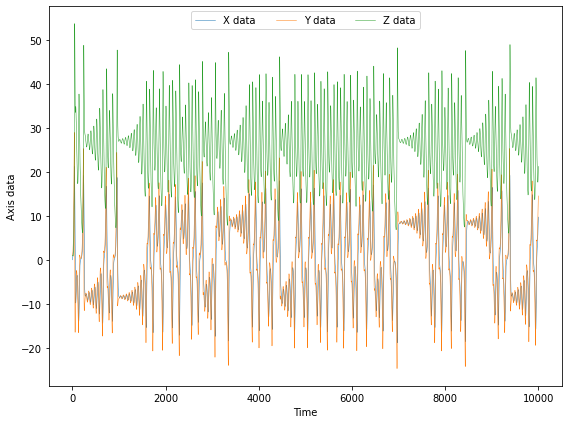

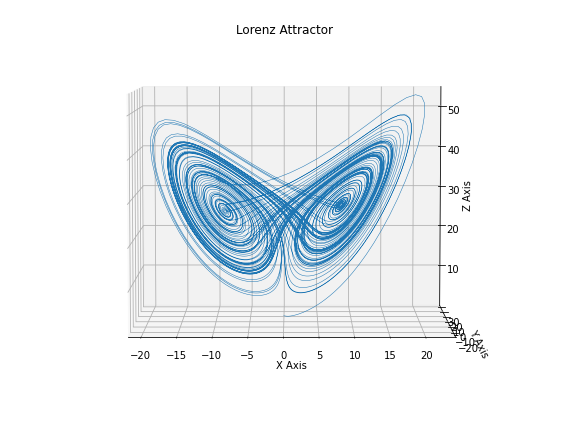

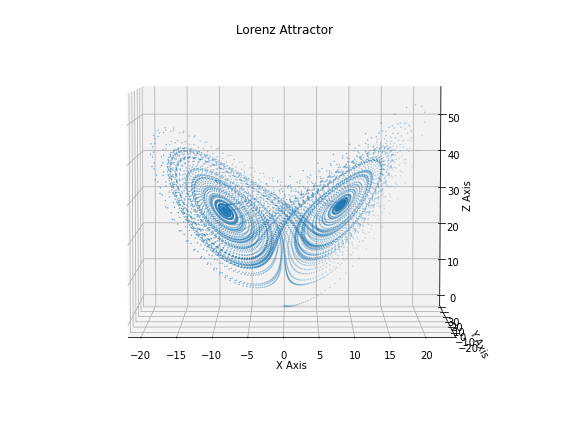

In [ ]:
plot('data', xs, ys, zs, range(0, len(xs)), rot = [5, -90])

# **Pendulum**

## **Pendulum equation**

In [ ]:
def f(theta, omega, t):
    return -theta - k * omega + A * np.cos(phi * t) 

## **Pendulum create**

In [ ]:
 def p_create(theta, omega, t, dt, nsteps, k, phi, A):

  t_list = [t]
  omega_list = [omega]
  theta_list = [theta]

  for step in range(0,10000):
      e = 0.07

      k1a = dt * omega 
      k1b = dt * f(theta, omega, t) 
      k2a = dt * (omega + k1b)
      k2b = dt * f(theta + k1a, omega + k1b, t + dt)

      theta = theta + (k1a + k2a) / 2 
      omega = omega + (k1b + k2b) / 2 
      t = t + dt 

      t_list.append(t)
      
      theta_list.append(theta)
      omega_list.append(omega)

  return t_list,theta_list, omega_list

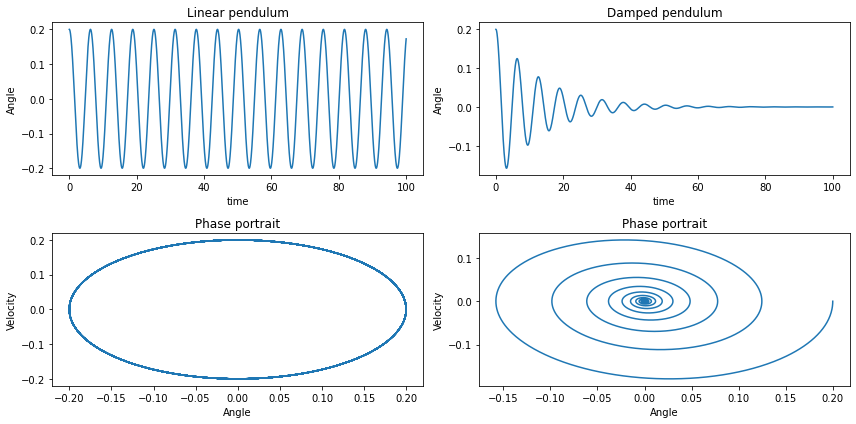

In [ ]:
theta = 0.2 #angle
omega = 0.0 #angular velocity
t = 0.0 #time
dt = 0.01 #increase
nsteps = 10000 #number of steps
k = 0.0 #damping coefficient
phi = 0.66667 #initial angular frequency
A = 0.0 #amplitude

time_pend, angles_pend, vel_pend = p_create(theta, omega, t, dt, nsteps, k, phi, A)

k = 0.15 #new damp

time_damp_pend, angles_damp_pend, vel_damp_pend = p_create(theta, omega, t, dt, \
                                                           nsteps, k, phi, A)


fig, axs = plt.subplots(2, 2, figsize=(12, 6))

axs[0, 0].set_title('Linear pendulum')
axs[0, 0].set_xlabel('time')
axs[0, 0].set_ylabel('Angle')
axs[0, 0].plot(time_pend, angles_pend)
axs[1, 0].set_title('Phase portrait')
axs[1, 0].set_xlabel('Angle')
axs[1, 0].set_ylabel('Velocity')
axs[1, 0].plot(angles_pend, vel_pend)
axs[0, 1].set_title('Damped pendulum')
axs[0, 1].set_xlabel('time')
axs[0, 1].set_ylabel('Angle')
axs[0, 1].plot(time_damp_pend, angles_damp_pend)
axs[1, 1].set_title('Phase portrait')
axs[1, 1].set_xlabel('Angle')
axs[1, 1].set_ylabel('Velocity')
axs[1, 1].plot(angles_damp_pend, vel_damp_pend)

fig.tight_layout()

plt.show()